### Import Necessary Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Merging 12 Months of Sales Data into a Single File

In [4]:
onlyfiles = [f for f in os.listdir("./Sales_Data")]

all_months_data=pd.DataFrame()

for file in onlyfiles:
    df=pd.read_csv(f"./Sales_Data/{file}")
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("./Output/all_data.csv",index=False)

### Read in updated dataframe

In [5]:
all_data=pd.read_csv("./Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### clean up the data

In [6]:
all_data.dropna(how='any',axis="rows",inplace = True)
all_data.dropna(how='any',axis="columns",inplace = True)

#### find "or" and delete it

In [7]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]

#### convert columns to the correct type

In [8]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

#### add month column

In [9]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype("int32")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### add a sales column

In [10]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### add a city column

In [11]:
#lets use .apply()
def get_city(address):
    return address.split(",")[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## what was the best month for sales? how much was earned that month?

In [12]:
results=all_data.groupby("Month").sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


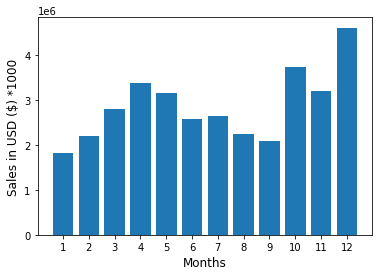

In [13]:
months=range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months,size=10)
plt.xlabel("Months",size=12)
plt.ylabel("Sales in USD ($) *1000",size=12)
plt.show()

## what city had the highest number of sales?

In [14]:
results_for_cities=all_data.groupby("City").sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


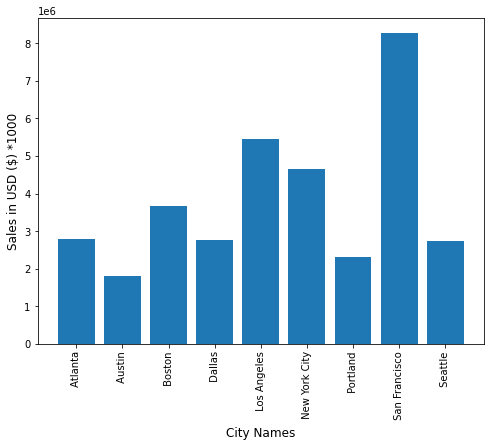

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
cities=[city for city,df in all_data.groupby("City")]
plt.bar(cities,results_for_cities["Sales"])
plt.xticks(cities, rotation="vertical",size=10)
plt.xlabel("City Names",size=12)
plt.ylabel("Sales in USD ($) *1000",size=12)
plt.show()

## what time should we display advertisements to maximize likelihood of cumtomer s nuying product

In [16]:
all_data["Order Date New"]=pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date New
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00


In [17]:
all_data["Hour"]=all_data["Order Date New"].dt.hour
all_data["Minute"]=all_data["Order Date New"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date New,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


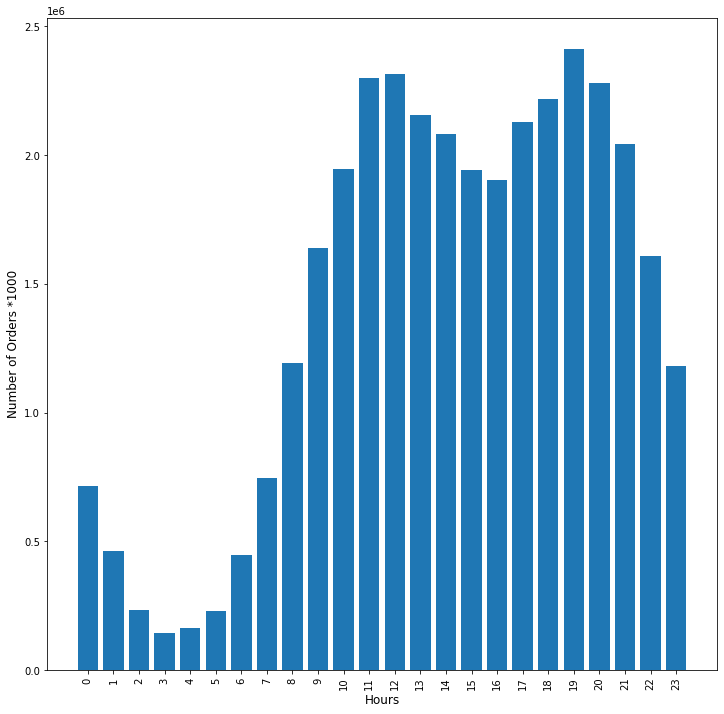

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
results_for_hours=all_data.groupby("Hour").sum()
hours=[hour for hour,df in all_data.groupby("Hour")]
plt.bar(hours,results_for_hours["Sales"])
plt.xticks(hours, rotation="vertical",size=10)
plt.xlabel("Hours",size=12)
plt.ylabel("Number of Orders *1000",size=12)
plt.show()

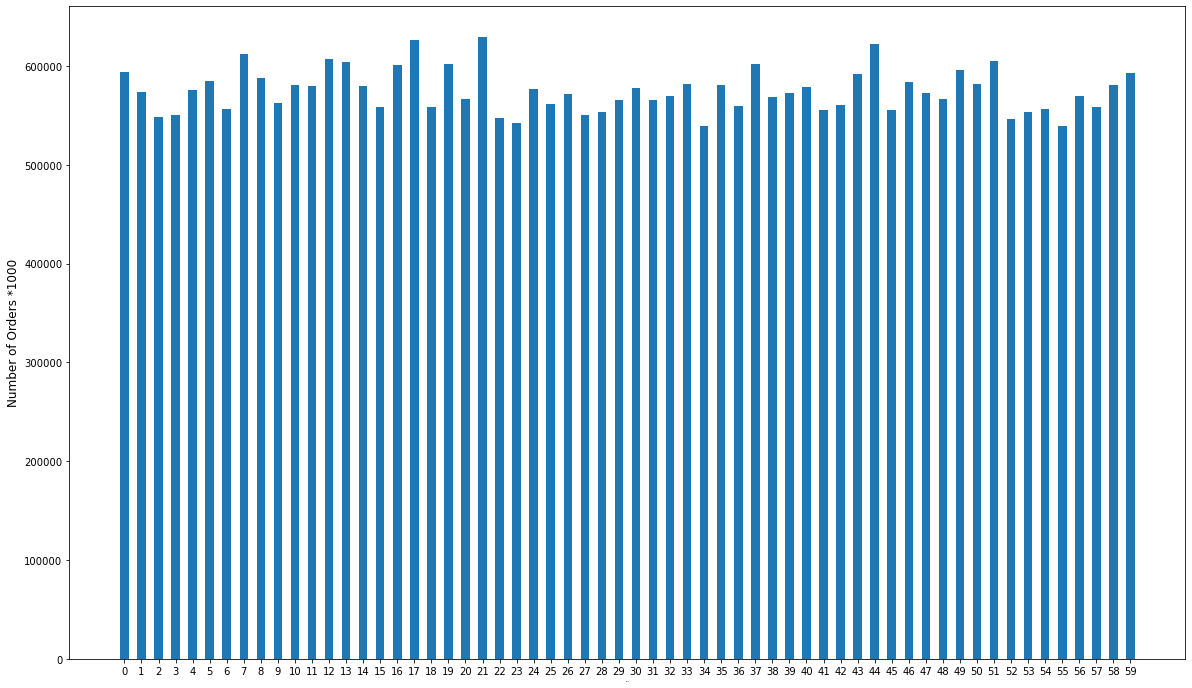

In [19]:
fig, ax = plt.subplots(figsize=(20,12))
results_for_minute=all_data.groupby("Minute").sum()
minutes=[minute for minute,df in all_data.groupby("Minute")]
plt.bar(minutes,results_for_minute["Sales"],width=0.5)
plt.xticks(minutes,size=10)
plt.xlabel("Minutes",size=1)
plt.ylabel("Number of Orders *1000",size=12)
plt.show()

## what products are most often sold together